Objective: In this excercise you will train a random forest on Titanic Data.

Due Date: January 14th 2019

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)

In [4]:
training_set = pd.read_csv("C:/Users/rahn91147/Desktop/Projects/Personal/Lantern/Machine Learning/train.csv")

In [5]:
test_set =pd.read_csv("C:/Users/rahn91147/Desktop/Projects/Personal/Lantern/Machine Learning/test.csv")

In [6]:
training_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
training_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

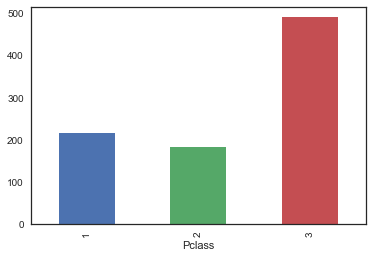

In [8]:
training_set.groupby("Pclass").Ticket.count().plot(kind='bar')

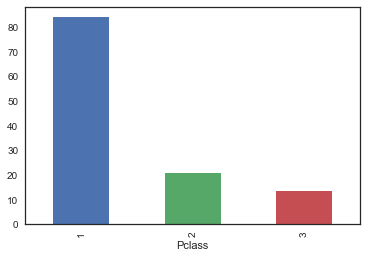

In [9]:
training_set.groupby("Pclass").Fare.mean().plot(kind='bar')

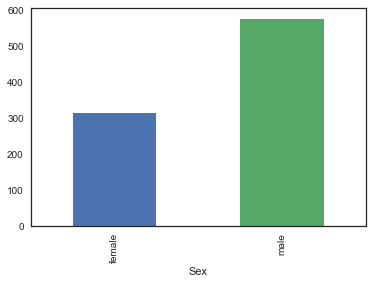

In [10]:
training_set.groupby("Sex").Ticket.count().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265EDA202B0>]],
      dtype=object)

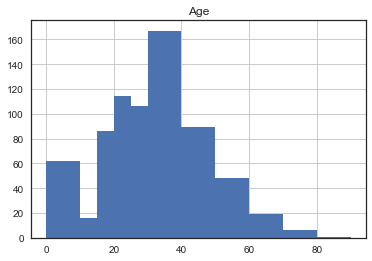

In [11]:
bins=[0,10,15,20,25,30,40,50,60,70,80,90]
training_set.hist(column='Age', bins=bins)
#Majority between 30-40 years

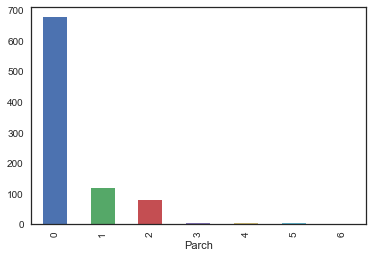

In [12]:
training_set.groupby("Parch").Ticket.count().plot(kind='bar')

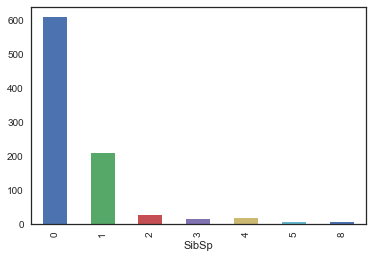

In [13]:
training_set.groupby("SibSp").Ticket.count().plot(kind='bar')

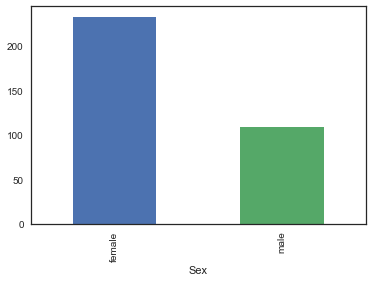

In [14]:
training_set.groupby("Sex").Survived.sum().plot(kind='bar')
#mostly women survived

In [15]:
training_set.isna().sum()
#missing values in Age and Cabin 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
training_set.shape
#missing 687 cabin numbers of 891 cabin numbers

(891, 12)

In [17]:
training_set.head()
# Dropping some of the unwanted variables:
training_set.drop('Cabin',axis=1,inplace=True)
training_set.drop('Ticket',axis=1,inplace=True)
training_set.drop('Fare',axis=1,inplace=True)
training_set.drop('Name',axis=1,inplace=True)
test_set.drop('Cabin',axis=1,inplace=True)
test_set.drop('Ticket',axis=1,inplace=True)
test_set.drop('Fare',axis=1,inplace=True)
test_set.drop('Name',axis=1,inplace=True)

In [18]:
#upper middle lower
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn import preprocessing

training_set['Sex-'] = training_set['Sex'].map({'male':1,'female':0})
test_set['Sex-'] = test_set['Sex'].map({'male':1,'female':0})
training_set['Scaled_Age'] = pd.DataFrame(preprocessing.scale(training_set.Age))
training_set['Scaled_SibSp'] = pd.DataFrame(preprocessing.scale(training_set.SibSp))
training_set['Scaled_Parch'] = pd.DataFrame(preprocessing.scale(training_set.Parch))
test_set['Scaled_Age'] = pd.DataFrame(preprocessing.scale(test_set.Age))
test_set['Scaled_SibSp'] = pd.DataFrame(preprocessing.scale(test_set.SibSp))
test_set['Scaled_Parch'] = pd.DataFrame(preprocessing.scale(test_set.Parch))

training_set.head()

C:\Users\rahn91147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rahn91147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rahn91147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rahn91147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex-,Scaled_Age,Scaled_SibSp,Scaled_Parch
0,1,0,3,male,22.0,1,0,S,1,-0.530377,0.432793,-0.473674
1,2,1,1,female,38.0,1,0,C,0,0.571831,0.432793,-0.473674
2,3,1,3,female,26.0,0,0,S,0,-0.254825,-0.474545,-0.473674
3,4,1,1,female,35.0,1,0,S,0,0.365167,0.432793,-0.473674
4,5,0,3,male,35.0,0,0,S,1,0.365167,-0.474545,-0.473674


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(training_set.Pclass)
integer_encoded_test = label_encoder.fit_transform(test_set.Pclass)
print(integer_encoded)

[2 0 2 0 2 2 0 2 2 1 2 0 2 2 2 1 2 1 2 2 1 1 2 0 2 2 2 0 2 2 0 0 2 1 0 0 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 0 1 0 0 1 2 1 2 2 0 0 2 0 2 1 2 2 2 1 2 1 2
 2 2 2 2 1 2 2 2 2 0 1 2 2 2 0 2 2 2 0 2 2 2 0 0 1 1 2 2 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 1 0 2 1 2 1 1 0 2 2 2 2 2 2 2 2 1 1 1 0 0 2 0 2 2 2 2 1 1 2 2
 1 1 1 0 2 2 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 0 1 2 2 1 2 1 2
 0 2 0 2 2 1 1 2 1 0 0 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 1 2 1 2 0 2 1 0 1 2 1
 2 2 0 2 1 2 1 2 0 2 1 2 1 2 1 1 1 1 2 2 1 2 2 0 2 1 0 1 2 2 0 2 2 2 0 0 0
 1 2 2 0 0 2 1 2 2 0 0 0 2 1 0 2 0 2 1 2 2 2 2 2 2 0 2 2 2 1 2 0 0 1 2 2 0
 2 0 0 0 2 2 2 1 2 0 0 0 1 0 0 0 1 2 1 2 1 1 0 0 2 2 1 1 2 0 2 1 2 0 2 0 0
 2 0 2 0 0 2 0 1 0 1 1 1 1 1 2 2 2 2 0 2 2 2 2 0 1 2 2 2 1 2 2 2 2 0 2 2 0
 0 2 2 0 2 0 2 0 2 2 0 2 2 0 2 1 2 1 2 1 0 2 2 0 2 2 2 1 1 1 2 2 2 2 2 1 2
 1 2 2 2 2 0 1 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 0 2 1 2 0 0 2 1 0 1 1 2 2 1
 2 0 1 0 2 0 1 2 0 0 2 2 0 0 1 2 0 2 0 1 2 2 1 0 2 2 2 2 1 1 2 0 1 2 2 2 2
 1 2 2 0 2 0 0 2 2 2 2 0 

In [20]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded_test = onehot_encoder.fit_transform(integer_encoded_test)

training_set['Upper']=onehot_encoded[:,0]
training_set['Middle']=onehot_encoded[:,1]
training_set['Lower']=onehot_encoded[:,2]
test_set['Upper']=onehot_encoded_test[:,0]
test_set['Middle']=onehot_encoded_test[:,1]
test_set['Lower']=onehot_encoded_test[:,2]
test_set.head()


C:\Users\rahn91147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\rahn91147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warn

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex-,Scaled_Age,Scaled_SibSp,Scaled_Parch,Upper,Middle,Lower
0,892,3,male,34.5,0,0,Q,1,0.298549,-0.499470,-0.400248,0.0,0.0,1.0
1,893,3,female,47.0,1,0,S,0,1.181328,0.616992,-0.400248,0.0,0.0,1.0
2,894,2,male,62.0,0,0,Q,1,2.240662,-0.499470,-0.400248,0.0,1.0,0.0
3,895,3,male,27.0,0,0,S,1,-0.231118,-0.499470,-0.400248,0.0,0.0,1.0
4,896,3,female,22.0,1,1,S,0,-0.584229,0.616992,0.619896,0.0,0.0,1.0


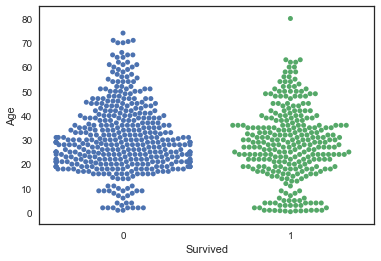

In [21]:
_ = sns.swarmplot(y='Age',x='Survived', data=training_set)
plt.show()

In [22]:
training_set.dropna(inplace=True)
test_set.dropna(inplace=True)
X_train = training_set.iloc[:,8:15]
y_train=training_set['Survived']

X_test = test_set.iloc[:,7:14]

Train a Random= Forest Classifier on your data. Whats the AUC value for your model? Plot the ROC Curve and interpret your results!



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
y_pred=clf.predict(X_test)
y_pred
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_imp
#sex and age matter the most in survival

Sex-            0.305179
Scaled_Age      0.426137
Scaled_SibSp    0.064695
Scaled_Parch    0.049067
Upper           0.060366
Middle          0.025122
Lower           0.069434
dtype: float64

No handles with labels found to put in legend.


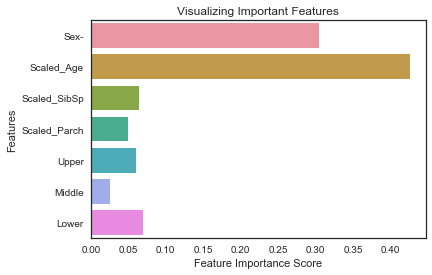

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [26]:
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 81.07


ROC AUC: 0.98


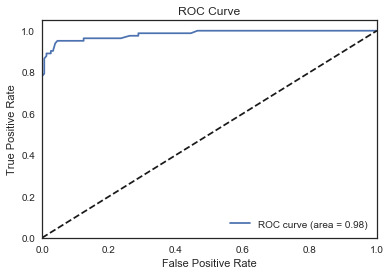

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.33)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


fpr, tpr, _ = roc_curve(y_test_2, clf.predict_proba(X_test_2)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
train_results=[]
test_results=[]
n_estimators=[]
for i in range(1,200):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(X_train_2, y_train_2)
    #accuracy acore
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    #AUC score, test set
    fpr, tpr, _ = roc_curve(y_test_2, rf.predict_proba(X_test_2)[:,1])
    roc_auc = auc(fpr, tpr)
    #AUC score, train set
    fpr2, tpr2, _ = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
    roc_auc2 = auc(fpr2, tpr2)
    n_estimators.append(i)
    test_results.append(roc_auc)
    train_results.append(roc_auc2)
    #print("N = " + str(i) + " :: Score = " + str(round(score,2)))
    #print("N = " + str(i) + " :: Test AUC = " + str(round(roc_auc,2)))
    #print("N = " + str(i) + " :: Training AUC = " + str(round(roc_auc,2)))

    #N=15 with accuracy score of 0.81 and AUC of 0.8 is selected


Step 4: Number of Estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore lets do a parameter search to find the sweet spot. Calculate the AUC score for different number of trees.

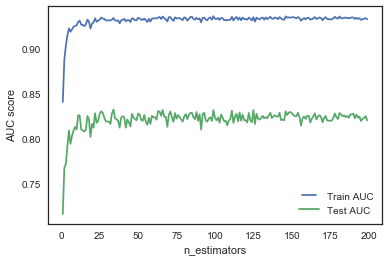

In [27]:
#train_results and test_results are lists of AUC scores for different number of estimators in train and test sets.
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, label="Train AUC")
line2, = plt.plot(n_estimators, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

Step 5: Tuning max_depth
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.

visualize the effect of max_depth for test and train set data AUC scores. What are your findings?

In [28]:
train_results=[]
test_results=[]
depth=[]
for i in range(1,7):
    rf = RandomForestClassifier(n_estimators = 15,max_depth=i)
    rf.fit(X_train_2, y_train_2)
    #accuracy acore
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    #AUC score, test set
    fpr, tpr, _ = roc_curve(y_test_2, rf.predict_proba(X_test_2)[:,1])
    roc_auc = auc(fpr, tpr)
    #AUC score, train set
    fpr2, tpr2, _ = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
    roc_auc2 = auc(fpr2, tpr2)
    depth.append(i)
    test_results.append(roc_auc)
    train_results.append(roc_auc2)

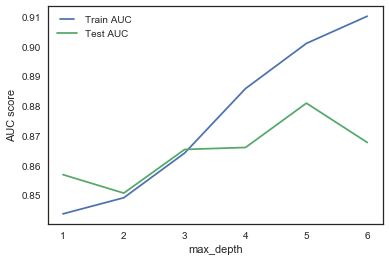

In [29]:
#train_results and test_results are lists of AUC scores for different number of estimators in train and test sets.
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(depth, train_results, label="Train AUC")
line2, = plt.plot(depth, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()
#Max depth of 5 shows high AUC score for test set

min_samples _split represents the minimum number of samples required to split an internal node.

This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Lets try and experiment with different values of this parameter from 10% to 100%.

In [47]:
test_results=[]
train_results=[]
min_samples_split=[]
a=0.1*len(X_train)
b=len(X_train)
for i in list(range(int(a),int(b))):
    rf = RandomForestClassifier(n_estimators = 15,max_depth=5, min_samples_split= i)
    rf.fit(X_train_2, y_train_2)
    #accuracy acore
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    #AUC score, test set
    fpr, tpr, _ = roc_curve(y_test_2, rf.predict_proba(X_test_2)[:,1])
    roc_auc = auc(fpr, tpr)
    #AUC score, train set
    fpr2, tpr2, _ = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
    roc_auc2 = auc(fpr2, tpr2)

    min_samples_split.append(i)
    test_results.append(roc_auc)
    train_results.append(roc_auc2)


71.2


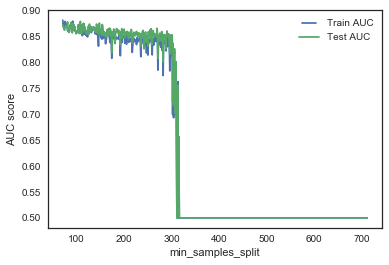

In [32]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split, train_results, label="Train AUC")
line2, = plt.plot(min_samples_split, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min_samples_split")
plt.show()
#mean samples split of 100

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree. We will continue experimenting different values using below calculation:

In [60]:
test_results=[]
train_results=[]
min_samples_leaf=np.linspace(0.1, 0.5, 5, endpoint=True)

for i in min_samples_leaf:
    rf = RandomForestClassifier(n_estimators = 15,max_depth=5, min_samples_leaf=i, min_samples_split=72)
    rf.fit(X_train_2, y_train_2)
    #accuracy acore
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    #AUC score, test set
    fpr, tpr, _ = roc_curve(y_test_2, rf.predict_proba(X_test_2)[:,1])
    roc_auc = auc(fpr, tpr)
    #AUC score, train set
    fpr2, tpr2, _ = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
    roc_auc2 = auc(fpr2, tpr2)
    test_results.append(roc_auc)
    train_results.append(roc_auc2)

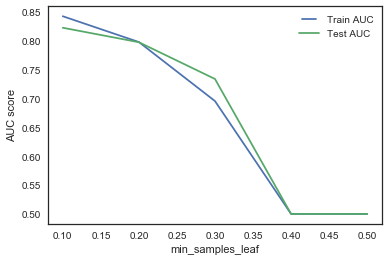

In [61]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, label="Train AUC")
line2, = plt.plot(min_samples_leaf, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min_samples_leaf")
plt.show()
#using 0.1 as min_samples_leaf

In [62]:
test_results=[]
train_results=[]
max_features = list(range(1,X_train.shape[1]))
for i in max_features:
    rf = RandomForestClassifier(n_estimators = 15,max_depth=5, min_samples_leaf=0.1, min_samples_split=72, max_features=i)
    rf.fit(X_train_2, y_train_2)
    #accuracy acore
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    #AUC score, test set
    fpr, tpr, _ = roc_curve(y_test_2, rf.predict_proba(X_test_2)[:,1])
    roc_auc = auc(fpr, tpr)
    #AUC score, train set
    fpr2, tpr2, _ = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
    roc_auc2 = auc(fpr2, tpr2)
    test_results.append(roc_auc)
    train_results.append(roc_auc2)

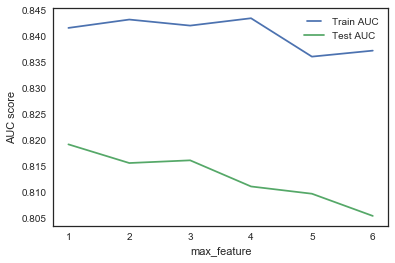

In [63]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, label="Train AUC")
line2, = plt.plot(max_features, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_feature")
plt.show()
#It is interesting that I changed min_samples leafs from 0.1 to 0.15 to 0.2 and each time the number of feature for the max AUC changes
#max features of 3 is selected

In [30]:
#Implementing Grid Search:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_param = {'n_estimators':[35,15], 'criterion':['gini', 'entropy'], 'bootstrap':[True, False], 'max_features':[3,4],'max_depth':[5,6], 'min_samples_leaf':[0.1,0.2],'min_samples_split':[72,100]}

In [65]:
classifier = RandomForestClassifier(n_estimators=300, random_state=0)  
gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5,n_jobs=-1)

In [66]:
gd_sr.fit(X_train, y_train)  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [35, 15], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'max_features': [3, 4], 'max_depth': [5, 6], 'min_samples_leaf': [0.1, 0.2], 'min_samples_split': [72, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
best_parameters = gd_sr.best_params_  
print(best_parameters) 
best_result = gd_sr.best_score_  
print(best_result)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 72, 'n_estimators': 35}
0.7794943820224719


In [67]:
#My model:
rf = RandomForestClassifier(n_estimators = 15,max_depth=5, min_samples_leaf=0.1, min_samples_split=72, max_features=3)
rf.fit(X_train_2, y_train_2)
    #accuracy acore

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=72,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
fpr, tpr, _ = roc_curve(y_train_2, clf.predict_proba(X_train_2)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC train: %0.2f' % roc_auc)
fpr2, tpr2, _ = roc_curve(y_test_2, clf.predict_proba(X_test_2)[:,1])
# Calculate the AUC for the testing set (defined as 33% of training test)
roc_auc = auc(fpr2, tpr2)
print('ROC AUC  test: %0.2f' % roc_auc)

ROC AUC train: 0.98
ROC AUC  test: 0.98


In [73]:
y_test = rf.predict(X_test)

In [74]:
#response to kaggle challenge:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,